In [203]:
import pandas as pd
import numpy as np

star_wars = pd.read_csv('StarWars.csv', encoding='ISO-8859-1')

star_wars = star_wars[star_wars['RespondentID'].notnull()]

## Maping values to Boolean

In [204]:
seen = 'Have you seen any of the 6 films in the Star Wars franchise?'
fan = 'Do you consider yourself to be a fan of the Star Wars film franchise?'
fan_st = 'Do you consider yourself to be a fan of the Star Trek franchise?'


yes_no_map = {
    'Yes': True,
    'No': False
}

star_wars[seen] = star_wars[seen].map(yes_no_map)
star_wars[fan] = star_wars[fan].map(yes_no_map)
star_wars[fan_st] = star_wars[fan_st].map(yes_no_map)


In [205]:
movie_names = []
for each in star_wars.iloc[4,3:9]:
    movie_names.append(each)

movie_map = {}
for i, each in enumerate(movie_names):
    if pd.isnull(each):
        movie_map[np.Nan] = False
    else:
        movie_map[each] = True
movie_map[np.NaN] = False

In [206]:
for each in star_wars.columns[3:9]:
    star_wars[each] = star_wars[each].map(movie_map)

## Renaming Column headers

In [207]:
movie_name = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
             'Unnamed: 4': 'seen_2',
             'Unnamed: 5': 'seen_3',
             'Unnamed: 6': 'seen_4',
             'Unnamed: 7': 'seen_5',
             'Unnamed: 8': 'seen_6'}
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
             'Unnamed: 4': 'seen_2',
             'Unnamed: 5': 'seen_3',
             'Unnamed: 6': 'seen_4',
             'Unnamed: 7': 'seen_5',
             'Unnamed: 8': 'seen_6'})

In [208]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [209]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [210]:
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
             'Unnamed: 10': 'ranking_2',
             'Unnamed: 11': 'ranking_3',
             'Unnamed: 12': 'ranking_4',
             'Unnamed: 13': 'ranking_5',
             'Unnamed: 14': 'ranking_6'})

In [211]:
ranking_mean = star_wars[star_wars.columns[9:15]].mean()
ranking_mean

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

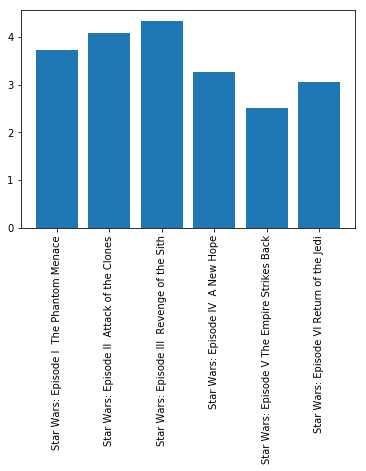

In [212]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(movie_names, ranking_mean)
plt.xticks(rotation = 90)

As of so far, the dataset was cleaned to use rankings of Star Wars fans.
It has been found that the fans have ranked Episode V as the favorite one.

Moreover, the older movies, Episodes IV,V and VI are more beloved by fans than the new ones.

In [213]:
seen_sum = star_wars[star_wars.columns[3:9]].sum()
seen_sum

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

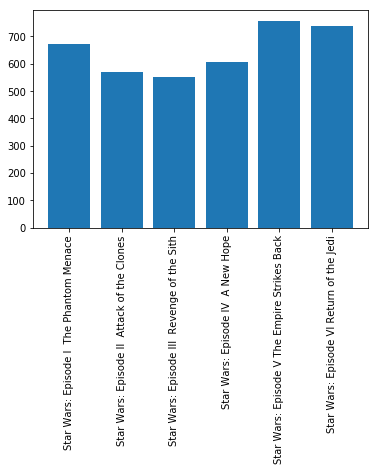

In [214]:
plt.bar(movie_names, seen_sum)
plt.xticks(rotation = 90)

Observations:
1 - The highest ranked movie is the most seen one.
2 - The old movies are seen more than the new ones.
3 - Less people tend to watch the newer episodes.

## Splitting the data

### On Gender

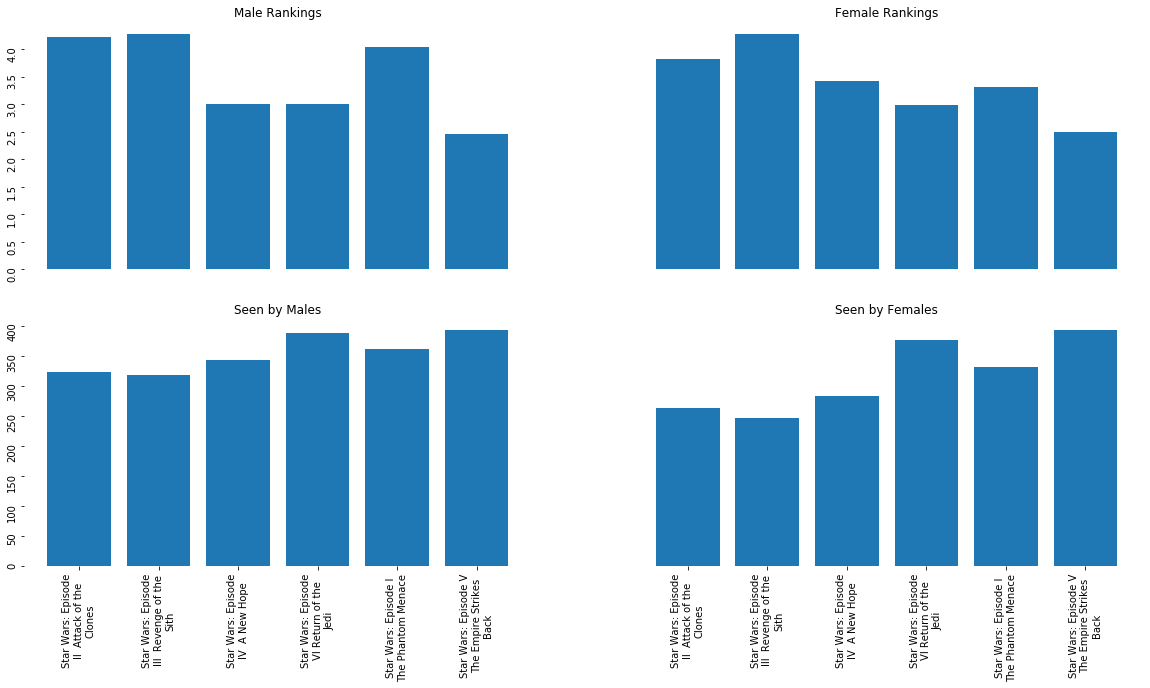

In [221]:
from textwrap import wrap
movies =  ['\n'.join(wrap(l, 20)) for l in movie_names]
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

ranking_males = males[males.columns[9:15]].mean()
ranking_females = females[females.columns[9:15]].mean()
seen_males = males[males.columns[3:9]].sum()
seen_females = females[females.columns[3:9]].sum()

plot_mf = [ranking_males, ranking_females, seen_males, seen_females]
titles_mf = ['Male Rankings', 'Female Rankings', 'Seen by Males', 'Seen by Females']

def plot_bar(var_ls, tit_ls):
    
    fig = plt.figure(figsize=(20,10))
    for i, each in enumerate(var_ls):
        ax = fig.add_subplot(2,2,i+1)
        ax.bar(movies, each)
        ax.tick_params(rotation = 90)
        #ax.text(wrap=True)
        ax.set_title(tit_ls[i])
        for key,spine in ax.spines.items():
                spine.set_visible(False)
        if i == 0 or i == 1:
            ax.get_xaxis().set_visible(False)
        if i == 1 or i == 3:
            ax.get_yaxis().set_visible(False)

plot_bar(plot_mf,titles_mf)

Females and Males both have similar rankings, such that they prefer the older Episodes.

### Fan or not of Star Wars

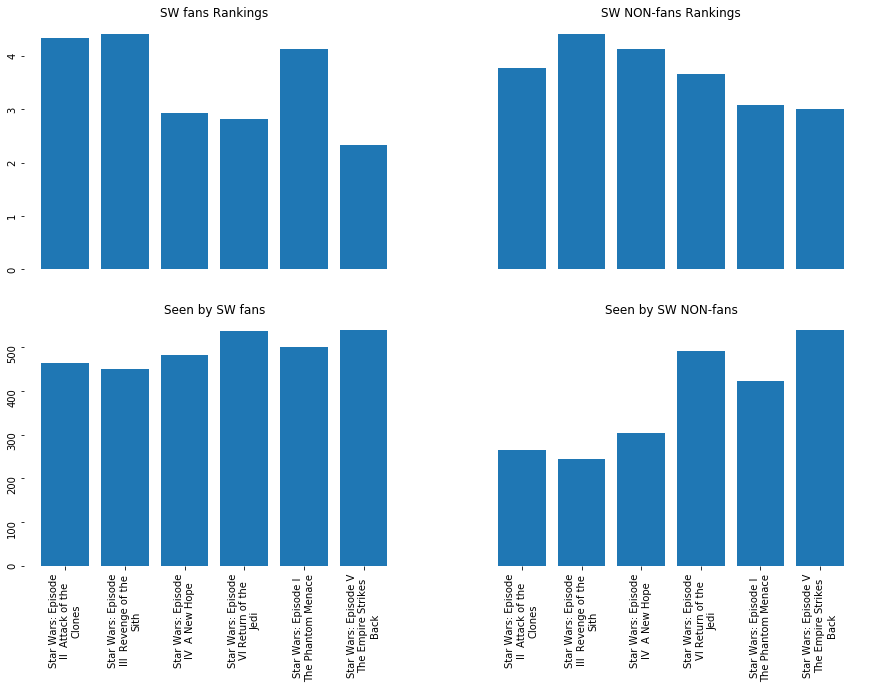

In [218]:
fan_sw = 'Do you consider yourself to be a fan of the Star Wars film franchise?'

sw_fan = star_wars[star_wars[fan_sw] == True]
sw_not_fan = star_wars[star_wars[fan_sw] == False]


ranking_swfans = sw_fan[sw_fan.columns[9:15]].mean()
ranking_swNfans = sw_not_fan[sw_not_fan.columns[9:15]].mean()
seen_swfans = sw_fan[sw_fan.columns[3:9]].sum()
seen_swNfans = sw_not_fan[sw_not_fan.columns[3:9]].sum()

plot_sw = [ranking_swfans, ranking_swNfans, seen_swfans,seen_swNfans]
titles_sw = ['SW fans Rankings', 'SW NON-fans Rankings', 'Seen by SW fans', 'Seen by SW NON-fans']
plot_bar(plot_sw,titles_sw)

Observations:
1 - Star Wars fans ranked the older movies higher esp. Episode V.
   2 - Very few of Star Wars non-fans have watched the newer movies

### Fan or not of Star Trek

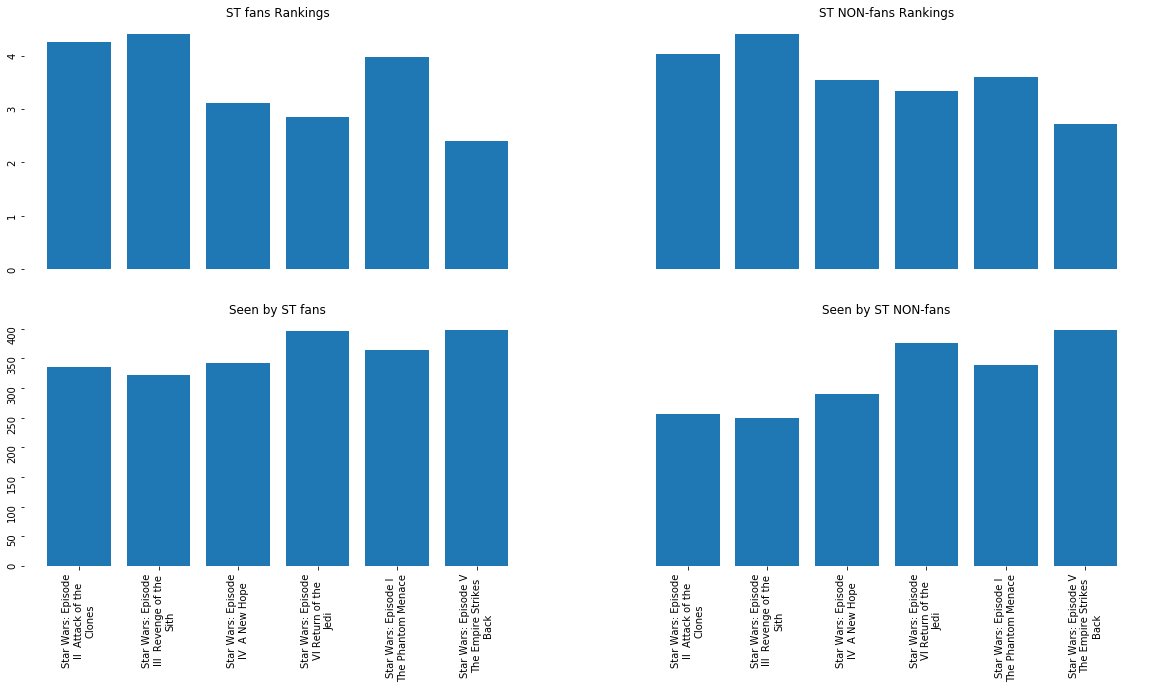

In [222]:
st_fan = star_wars[star_wars[fan_st] == True]
st_not_fan = star_wars[star_wars[fan_st] == False]


ranking_stfans = st_fan[st_fan.columns[9:15]].mean()
ranking_stNfans = st_not_fan[st_not_fan.columns[9:15]].mean()
seen_stfans = st_fan[st_fan.columns[3:9]].sum()
seen_stNfans = st_not_fan[st_not_fan.columns[3:9]].sum()

plot_st = [ranking_stfans, ranking_stNfans, seen_stfans,seen_stNfans]
titles_st = ['ST fans Rankings', 'ST NON-fans Rankings', 'Seen by ST fans', 'Seen by ST NON-fans']

plot_bar(plot_st,titles_st)

Observations:
1 - Star Trek fans and non-fans liked the older Star Wars episods more than the newer ones
2 - The old movies were watched more than the new ones.
3 - Non Star Trek fans watched less of the newer movies than the Star Trek fans

Conclusion:

No matter if you are a Star Wars fan or not or even a Star Trek fan,
You will enjoy the older episodes than the newer ones. Esp. The Empire Strikes back.